In [1]:
# Base Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Add any other imports or libraries you may need to answer these questions
import seaborn as sns
import statistics
import datetime

# Instructions:

You are working with a business partner who wants to implement an intervention program to help health plan members with certain diseases. The first step is to identify those members who have one of five diseases, so that a clinician can contact and introduce them to the services and supports that are available to them as a health plan member. The business partner has a dataset of test results for a subset of members, but the test results do not definitively say which members have which diseases. You have been asked to help inform which members should receive which disease intervention. Due to resource constraints, each member can receive an intervention for one disease only. 

The dataset collected by your business partner (disease_dataset.csv) contains health plan members' medical testing results. The members have been tested at various testing facilities, or "testers" (named Tester_1, Tester_2, and so on). The output from the test is a set of probabilities representing the likelihood that an individual has each of the five diseases (Disease_1, ..., Disease_5). Members are denoted Member_1, Member_2, etc.

Each row in the dataset represents the testing results from one member's visit to a given tester. Members may have visited multiple different testers on different dates. For example, (Member_1, Tester_1, 0.261319, 0.124901, 0.272108, 0.190239, 0.151433) represents testing results of Member_1 with Tester_1. The results mean that Member_1 has a 26.1319% chance of having Disease_1, and so on.

In python and using the dataset provided, please answer as many of the questions below as possible in the time allotted. It is okay if you do not get to every question. For example, it's fine if you end up exploring part 3 more deeply and don't get to parts 4 and 5. We want to see how you think through this problem and express your ideas in both code and in text. Some things we like to see are clean, well-documented code, sanity checks and tests, and creativity. Be sure to explain your ideas as best as you can using code, pseudo code, comments, etc. Please add any visualizations you think are neccesary to tell your story. Last but not least, remember to have fun. :)

**Please spend a maximum of 4 hours on this take-home assessment. It may not take the whole time to complete the exercise.** 

In [2]:
# load the data (Removed the actual location)
Data = pd.read_csv(r'C:\Users\XXXX\PythonScripts\disease_dataset.csv')
Data.head(10)

,Disease_1,Disease_2,Disease_3,Disease_4,Disease_5,member,tester,test_time
0,0.173539,0.222751,0.050914,0.305786,0.247011,Member_4,Tester_4,2018-09-13 22:32:51.043099
1,0.149458,0.460099,0.065291,0.076716,0.248436,Member_4,Tester_4,2019-01-02 22:32:51.043099
2,0.106462,0.539747,0.184823,0.117502,0.051465,Member_4,Tester_4,2018-12-26 22:32:51.043099
3,0.097075,0.433228,0.138138,0.220238,0.111321,Member_4,Tester_4,2019-02-02 22:32:51.043099
4,0.098795,0.630653,0.057596,0.075635,0.137321,Member_4,Tester_4,2019-02-02 22:32:51.043099
5,0.206925,0.435092,0.047356,0.047503,0.263125,Member_4,Tester_4,2018-11-06 22:32:51.043099
6,0.153873,0.513456,0.173935,0.067853,0.090884,Member_4,Tester_4,2018-11-23 22:32:51.043099
7,0.056332,0.573229,0.207027,0.053006,0.110407,Member_4,Tester_4,2018-12-02 22:32:51.043099
8,0.043528,0.665023,0.159797,0.086707,0.044945,Member_4,Tester_4,2018-10-11 22:32:51.043099
9,0.163891,0.552900,0.066908,0.149130,0.067171,Member_4,Tester_4,2018-09-26 22:32:51.043099


# Question 1

Do some exploratory analysis on the dataset and note your findings. Do you see any interesting patterns? Please include visualizations where appropriate.

In [3]:
Data.describe()

,Disease_1,Disease_2,Disease_3,Disease_4,Disease_5
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.201104,0.296444,0.169680,0.160593,0.172179
std,0.110225,0.189362,0.090518,0.098918,0.102000
min,0.000729,0.002371,0.000637,0.000324,0.000833
25%,0.129006,0.168543,0.112434,0.097670,0.110119
50%,0.202080,0.217769,0.169955,0.161616,0.169892
75%,0.263245,0.421339,0.219022,0.203110,0.214928
max,0.817617,0.927073,0.819462,0.841941,0.832541


**Observation: The mean and std row for Disease_2 is higher than the other four diseases.**

Let us check the number of unique values for member and tester

In [4]:
print('How many members have tested for the diseases? ', len(Data['member'].unique()))
print('What are the unique members? ', Data['member'].unique())
unq_member = Data['member'].unique()

print('\n')
print('How many testers are used to identify the diseases? ', len(Data['tester'].unique()))
print('What are the unique testers? ', Data['tester'].unique())
unq_tester = Data['tester'].unique()

How many members have tested for the diseases?  28
What are the unique members?  ['Member_4' 'Member_17' 'Member_14' 'Member_7' 'Member_2' 'Member_21'
 'Member_22' 'Member_65' 'Member_13' 'Member_34' 'Member_3' 'Member_26'
 'Member_33' 'Member_39' 'Member_68' 'Member_1' 'Member_51' 'Member_66'
 'Member_5' 'Member_55' 'Member_11' 'Member_78' 'Member_102' 'Member_6'
 'Member_28' 'Member_35' 'Member_52' 'Member_44']


How many testers are used to identify the diseases?  25
What are the unique testers?  ['Tester_4' 'Tester_33' 'Tester_3' 'Tester_55' 'Tester_2' 'Tester_65'
 'Tester_7' 'Tester_26' 'Tester_44' 'Tester_52' 'Tester_13' 'Tester_14'
 'Tester_39' 'Tester_68' 'Tester_85' 'Tester_22' 'Tester_35' 'Tester_1'
 'Tester_28' 'Tester_21' 'Tester_11' 'Tester_51' 'Tester_17' 'Tester_34'
 'Tester_5']


**Plot the histogram of disease probabilities to check if they are similar and normally distributed or not**

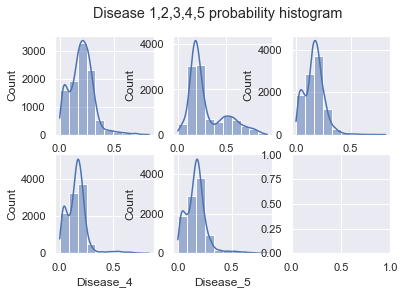

In [5]:
sns.set()
fig, axes = plt.subplots(2, 3)
fig.suptitle('Disease 1,2,3,4,5 probability histogram')

sns.histplot(data=Data, x='Disease_1', kde=True, bins=10, ax=axes[0,0])
sns.histplot(data=Data, x='Disease_2', kde=True, bins=10, ax=axes[0,1])
sns.histplot(data=Data, x='Disease_3', kde=True, bins=10, ax=axes[0,2])
sns.histplot(data=Data, x='Disease_4', kde=True, bins=10, ax=axes[1,0])
sns.histplot(data=Data, x='Disease_5', kde=True, bins=10, ax=axes[1,1])
plt.show()

**Observation:** 

**1. None of the histograms are normally distributed.**

**2. Based on this exploratory analysis, the 'Disease 2' histogram is showing a different pattern than the other three. There is no dip around bin 0.1 and the count is not steadily decreasing after bin 0.3. It is also showing another peak at bin 0.5.**

It needs further analysis to check why "Disease 2" is showing a different pattern from others.

# Question 2

Based on some reports, your business partner suspects that some of the testers have biased results. For example, they've noticed that some testers systematically assign a high probability to Disease_2, relative to other testers. Provide evidence that this is happening in the dataset.

**The approach taken for this question is:** 

**First the Data is grouped by testers and the dataframe grouped_summary_df is used to store the number of cases, mean and median values of all 5 diseases for each single group**

**Second, the dataframe grouped_summary_df is analyzed further to determine which tester/s have higher mean and median values than general. A threshold is chosen based on the histograms and the biased members are identified.**

In [6]:
# Group by testers and check the values
grouped_testers = Data.groupby('tester')
grouped_summary_df = pd.DataFrame(columns=['TesterName', 'NumberofCases', 'D1mean', 'D1median', 'D2mean', 'D2median', 'D3mean', 'D3median', 'D4mean', 'D4median', 'D5mean', 'D5median'])
nc, d1mn, d1md, d2mn, d2md, d3mn, d3md, d4mn, d4md, d5mn, d5md = [], [], [], [], [], [], [], [], [], [], []
for tester in unq_tester:
    tmp_df = grouped_testers.get_group(tester)
    nc.append(len(tmp_df))
    d1mn.append(statistics.mean(tmp_df['Disease_1']))
    d1md.append(statistics.median(tmp_df['Disease_1']))
    d2mn.append(statistics.mean(tmp_df['Disease_2']))
    d2md.append(statistics.median(tmp_df['Disease_2']))
    d3mn.append(statistics.mean(tmp_df['Disease_3']))
    d3md.append(statistics.median(tmp_df['Disease_3']))
    d4mn.append(statistics.mean(tmp_df['Disease_4']))
    d4md.append(statistics.median(tmp_df['Disease_4']))
    d5mn.append(statistics.mean(tmp_df['Disease_5']))
    d5md.append(statistics.median(tmp_df['Disease_5']))
    
grouped_summary_df['TesterName'] = unq_tester
grouped_summary_df['NumberofCases'] = nc
grouped_summary_df['D1mean'] = d1mn
grouped_summary_df['D2mean'] = d2mn
grouped_summary_df['D3mean'] = d3mn
grouped_summary_df['D4mean'] = d4mn
grouped_summary_df['D5mean'] = d5mn
grouped_summary_df['D1median'] = d1md
grouped_summary_df['D2median'] = d2md
grouped_summary_df['D3median'] = d3md
grouped_summary_df['D4median'] = d4md
grouped_summary_df['D5median'] = d5md

grouped_summary_df

,TesterName,NumberofCases,D1mean,D1median,D2mean,D2median,D3mean,D3median,D4mean,D4median,D5mean,D5median
0,Tester_4,500,0.154539,0.119457,0.318041,0.290585,0.201577,0.127293,0.205540,0.133936,0.120303,0.100920
1,Tester_33,200,0.261401,0.257220,0.182525,0.181288,0.187352,0.184637,0.181572,0.180828,0.187150,0.183721
2,Tester_3,400,0.223392,0.224354,0.206582,0.198062,0.205960,0.200368,0.180471,0.174306,0.183596,0.182960
3,Tester_55,400,0.178066,0.166891,0.568720,0.541448,0.125707,0.077825,0.060344,0.048743,0.067162,0.057182
4,Tester_2,200,0.189444,0.187572,0.187903,0.187400,0.256589,0.256571,0.183179,0.180147,0.182885,0.179138
5,Tester_65,600,0.180864,0.169630,0.515102,0.510931,0.102307,0.070046,0.062041,0.051739,0.139685,0.086046
6,Tester_7,500,0.229315,0.228950,0.187738,0.183737,0.180215,0.175857,0.187339,0.183542,0.215392,0.212489
7,Tester_26,700,0.240712,0.243809,0.197230,0.190051,0.194796,0.188402,0.185877,0.183935,0.181384,0.179419
8,Tester_44,200,0.316723,0.283686,0.115425,0.098859,0.127001,0.113385,0.326644,0.334882,0.114208,0.098060
9,Tester_52,300,0.174510,0.151801,0.321898,0.314168,0.126697,0.116451,0.116915,0.100092,0.259980,0.174711


In [7]:
grouped_summary_df.describe()

,NumberofCases,D1mean,D1median,D2mean,D2median,D3mean,D3median,D4mean,D4median,D5mean,D5median
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,400.000000,0.202018,0.189656,0.291654,0.277545,0.168552,0.153703,0.163448,0.151356,0.174327,0.164299
std,173.205081,0.059059,0.062733,0.166053,0.167958,0.046579,0.055258,0.059452,0.064987,0.068708,0.081362
min,200.000000,0.066847,0.060079,0.115425,0.098859,0.058285,0.046732,0.060344,0.048743,0.061501,0.052090
25%,200.000000,0.178066,0.166891,0.191015,0.186550,0.126697,0.109900,0.117464,0.100092,0.139685,0.099228
50%,400.000000,0.222013,0.207427,0.212524,0.198062,0.182781,0.179061,0.182518,0.179756,0.183217,0.181327
75%,500.000000,0.233299,0.230219,0.318041,0.290585,0.198688,0.188402,0.185877,0.180828,0.187614,0.186252
max,700.000000,0.316723,0.283686,0.750300,0.759911,0.256589,0.256571,0.326644,0.334882,0.401195,0.462521


**Observation: If we look at the bottom row of the description matrix (the 'max' column), we will see that the values in the D2mean and D2median column are way higher than any other columns D1mean, D1median and so on.**

This means some of the values in the grouped_summary_df['D2mean'] column and grouped_summary_df['D2median'] are exceptionally high. Let us plot D1, D2, D3, D4, D5 side-by-side to find out.

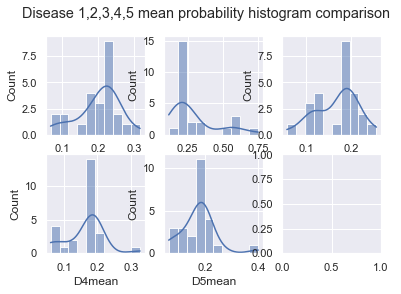

In [8]:
sns.set()
fig, axes = plt.subplots(2, 3)
fig.suptitle('Disease 1,2,3,4,5 mean probability histogram comparison ')

sns.histplot(data=grouped_summary_df, x='D1mean', kde=True, bins=10, ax=axes[0,0])
sns.histplot(data=grouped_summary_df, x='D2mean', kde=True, bins=10, ax=axes[0,1])
sns.histplot(data=grouped_summary_df, x='D3mean', kde=True, bins=10, ax=axes[0,2])
sns.histplot(data=grouped_summary_df, x='D4mean', kde=True, bins=10, ax=axes[1,0])
sns.histplot(data=grouped_summary_df, x='D5mean', kde=True, bins=10, ax=axes[1,1])
plt.show()

**Observation: If we look at the x axis of all the plots, we will see that only D2mean extended more than 0.3-0.4. Now we will check which tester has mean probability > 0.4**

In [9]:
print(grouped_summary_df['TesterName'][grouped_summary_df['D2mean'] > 0.4])

3     Tester_55
5     Tester_65
14    Tester_85
16    Tester_35
24     Tester_5
Name: TesterName, dtype: object


**These are the 5 testers who has biased results for Disease 2**

**[Tester_55,  Tester_65, Tester_85, Tester_35, Tester_5]**

# Question 3

There are many different ways one might automatically detect this type of testing bias. Describe at least three metrics and/or approaches you might use. Then write a function that programmatically detects biased testers and outputs a real-valued bias score between 0 and 1.

### For prediction models, it is generally advised to use precision, recall, F1 score, area under the ROC curve for testing bias. I have also got some matrices used in commercial softwares as shown below:

### Pre training matrices
1. Class Imbalance
2. Difference in Positive Proportions of True Labels (DPPL)
3. Kullback-Liebler (KL Divergence) 
4. Jensen-Shannon Divergences (JS Divergence)
5. Conditional Demographic Disparity in Labels (CDDL)

### Post training matrices
1. Disparate (Adverse) Impact and Difference in Positive Proportions in Predicted Labels (DPPL)
2. Difference in conditional outcome (acceptance and rejection)
3. Recall, precision, and accuracy differences
4. Treatment Equality
5. Counterfactual Flip Test

**Here I have used the class imbalance method - same as shown in Question 2**

In [10]:
for t in unq_tester:
    print(t)
    print(grouped_summary_df['D2mean'][grouped_summary_df['TesterName']==t]*(grouped_summary_df['NumberofCases'][grouped_summary_df['TesterName'] == t]/len(Data))*100)

Tester_4
0    1.590207
dtype: float64
Tester_33
1    0.36505
dtype: float64
Tester_3
2    0.826329
dtype: float64
Tester_55
3    2.27488
dtype: float64
Tester_2
4    0.375807
dtype: float64
Tester_65
5    3.090613
dtype: float64
Tester_7
6    0.938689
dtype: float64
Tester_26
7    1.38061
dtype: float64
Tester_44
8    0.230849
dtype: float64
Tester_52
9    0.965693
dtype: float64
Tester_13
10    0.371218
dtype: float64
Tester_14
11    1.337108
dtype: float64
Tester_39
12    0.733096
dtype: float64
Tester_68
13    0.770412
dtype: float64
Tester_85
14    2.926337
dtype: float64
Tester_22
15    0.774869
dtype: float64
Tester_35
16    2.837322
dtype: float64
Tester_1
17    0.637572
dtype: float64
Tester_28
18    1.457087
dtype: float64
Tester_21
19    1.527119
dtype: float64
Tester_11
20    1.22059
dtype: float64
Tester_51
21    0.630004
dtype: float64
Tester_17
22    0.439352
dtype: float64
Tester_34
23    0.443036
dtype: float64
Tester_5
24    1.500601
dtype: float64


In [11]:
def bias_score(tester):
    return grouped_summary_df['D2mean'][grouped_summary_df['TesterName']==tester]*(grouped_summary_df['NumberofCases'][grouped_summary_df['TesterName'] == tester]/len(Data))*100
    

In [12]:
bias_score('Tester_34')

23    0.443036
dtype: float64

# Question 4

Your business partner wants to pilot the intervention program with members who have Disease_1. She asks you to develop an algorithm to identify and rank the best members in the dataset for the program. Write a generic function that generates a ranked list of members for a particular disease as of a given date. Then generate a list for Disease_1. Be sure to clearly explain any important assumptions and design decisions.

**The approach taken for this question is:**

**1. First, create a dataframe with ALL the values BEFORE the 'date' (the 'date' value MUST be in datetime format)**

**2. Group by member name**

**3. For each member, calculate the mean probability for the given 'disease'**

**4. Order those according to mean probability and return the result.**

In [13]:
# Convert 'test_time' column to datetime
Data['test_time'] = pd.to_datetime(Data['test_time'])

def identify_and_rank(dataset, disease, date):
    member_summary_df = pd.DataFrame(columns=['MemberName', 'MeanDiseaseProbability'])
    mn, md = [], []
    tmp_df = dataset[dataset['test_time'] <= date]
    unqm = tmp_df['member'].unique()
    grouped_members = tmp_df.groupby('member')
    for member in unqm:
        df = grouped_members.get_group(member)
        mn.append(member)
        md.append(statistics.mean(df[disease]))
    member_summary_df['MemberName'], member_summary_df['MeanDiseaseProbability'] = mn, md
    member_summary_df = member_summary_df.sort_values(by='MeanDiseaseProbability', ascending=False)
    #print(member_summary_df)
    return member_summary_df['MemberName']

In [14]:
identify_and_rank(Data, 'Disease_1', datetime.datetime(2018, 10, 13))

8      Member_34
7      Member_13
5      Member_22
3       Member_2
10     Member_26
1      Member_17
2      Member_14
18      Member_7
24     Member_52
25     Member_44
19     Member_78
4      Member_21
13     Member_68
6      Member_65
0       Member_4
16      Member_5
9       Member_3
11     Member_33
12     Member_39
14     Member_51
17     Member_55
23     Member_35
20    Member_102
22     Member_28
21      Member_6
15     Member_66
Name: MemberName, dtype: object

## Question 5

Now your business partner wants to scale the program to all five diseases. Generate the five lists of members for her.

### Run the function for ALL the diseases

In [15]:
identify_and_rank(Data, 'Disease_2', datetime.datetime(2018, 10, 13))

22     Member_28
15     Member_66
0       Member_4
14     Member_51
12     Member_39
3       Member_2
9       Member_3
17     Member_55
16      Member_5
1      Member_17
25     Member_44
13     Member_68
24     Member_52
8      Member_34
6      Member_65
10     Member_26
19     Member_78
4      Member_21
18      Member_7
5      Member_22
2      Member_14
7      Member_13
11     Member_33
21      Member_6
23     Member_35
20    Member_102
Name: MemberName, dtype: object

In [16]:
identify_and_rank(Data, 'Disease_3', datetime.datetime(2018, 10, 13))

11     Member_33
14     Member_51
9       Member_3
12     Member_39
4      Member_21
19     Member_78
2      Member_14
18      Member_7
24     Member_52
5      Member_22
13     Member_68
10     Member_26
7      Member_13
25     Member_44
6      Member_65
16      Member_5
1      Member_17
0       Member_4
20    Member_102
8      Member_34
3       Member_2
17     Member_55
21      Member_6
22     Member_28
23     Member_35
15     Member_66
Name: MemberName, dtype: object

In [17]:
identify_and_rank(Data, 'Disease_4', datetime.datetime(2018, 10, 13))

20    Member_102
21      Member_6
15     Member_66
19     Member_78
18      Member_7
13     Member_68
4      Member_21
24     Member_52
25     Member_44
5      Member_22
2      Member_14
10     Member_26
7      Member_13
11     Member_33
6      Member_65
1      Member_17
16      Member_5
23     Member_35
9       Member_3
12     Member_39
0       Member_4
8      Member_34
3       Member_2
14     Member_51
22     Member_28
17     Member_55
Name: MemberName, dtype: object

In [18]:
identify_and_rank(Data, 'Disease_5', datetime.datetime(2018, 10, 13))

23     Member_35
17     Member_55
6      Member_65
16      Member_5
13     Member_68
2      Member_14
4      Member_21
25     Member_44
24     Member_52
5      Member_22
19     Member_78
18      Member_7
10     Member_26
7      Member_13
11     Member_33
0       Member_4
1      Member_17
21      Member_6
9       Member_3
8      Member_34
3       Member_2
14     Member_51
12     Member_39
20    Member_102
22     Member_28
15     Member_66
Name: MemberName, dtype: object